In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import glob
import os
import re
import unicodedata
from collections import deque

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

from funcs.tse import get_ticker_list

In [3]:
def get_ticker_name_list(list_ticker: list) -> dict:
    df = get_ticker_list()
    list_name = list(df[df["コード"].isin(list_ticker)]["銘柄名"])
    dict_name = dict()
    for ticker, name in zip(list_ticker, list_name):
        dict_name[ticker] = name
    return dict_name

In [4]:
pattern_glob = "2025/up_down_ratio_*.html"
pattern_re = re.compile(r"2025/up_down_ratio_[0-9]{2}-[0-9]{2}\.html")

In [5]:
list1 = sorted(glob.glob(pattern_glob))
list2 = deque(maxlen=100)
for file in list1:
    m = pattern_re.match(file)
    if m:
        list2.append(file)
list2

deque(['2025/up_down_ratio_03-17.html',
       '2025/up_down_ratio_03-18.html',
       '2025/up_down_ratio_03-19.html',
       '2025/up_down_ratio_03-21.html',
       '2025/up_down_ratio_03-24.html',
       '2025/up_down_ratio_03-25.html',
       '2025/up_down_ratio_03-26.html',
       '2025/up_down_ratio_03-27.html',
       '2025/up_down_ratio_03-28.html',
       '2025/up_down_ratio_03-31.html',
       '2025/up_down_ratio_04-01.html',
       '2025/up_down_ratio_04-02.html',
       '2025/up_down_ratio_04-03.html',
       '2025/up_down_ratio_04-04.html',
       '2025/up_down_ratio_04-07.html',
       '2025/up_down_ratio_04-08.html',
       '2025/up_down_ratio_04-09.html',
       '2025/up_down_ratio_04-10.html',
       '2025/up_down_ratio_04-11.html',
       '2025/up_down_ratio_04-14.html',
       '2025/up_down_ratio_04-15.html',
       '2025/up_down_ratio_04-16.html',
       '2025/up_down_ratio_04-17.html',
       '2025/up_down_ratio_04-18.html',
       '2025/up_down_ratio_04-21.html',


In [6]:
dict_ranking = dict()
for file in list2:
    df_table = pd.read_html(file, encoding="utf8")[0]
    for code in df_table["コード"]:
        if code in dict_ranking.keys():
            dict_ranking[code] += 1
        else:
            dict_ranking[code] = 1
df = pd.DataFrame({
    "code": dict_ranking.keys(),
    "name": None,
    "freq": dict_ranking.values()
})
df_ranking = df.sort_values('freq', ascending=False, ignore_index=True)[:10]
df_ranking

,code,name,freq
0,4592,None,81
1,290A,None,79
2,3350,None,76
3,218A,None,72
4,4584,None,66
5,4593,None,66
6,5595,None,64
7,3825,None,59
8,2586,None,58
9,7014,None,58


In [7]:
dict_name = get_ticker_name_list(list(df_ranking["code"]))
for i, code in enumerate(df_ranking["code"]):
    if f"{code}" in dict_name.keys():
        df_ranking.at[i, "name"] = unicodedata.normalize('NFKC', dict_name[code])
df_ranking

,code,name,freq
0,4592,Liberaware,81
1,290A,フルッタフルッタ,79
2,3350,Synspective,76
3,218A,メタプラネット,72
4,4584,リミックスポイント,66
5,4593,キッズウェル・バイオ,66
6,5595,サンバイオ,64
7,3825,ヘリオス,59
8,2586,QPS研究所,58
9,7014,名村造船所,58


In [8]:
print('<table class="simple">')
print('<thead>')
print('<tr>')
print('<th>コード</th>')
print('<th>銘柄名</th>')
print('<th>頻度</th>')
print('</tr>')
print('</thead>')
print('<tbody>')
for r in range(len(df_ranking)):
    code = df_ranking.at[r, "code"]
    name = df_ranking.at[r, "name"]
    freq = df_ranking.at[r, "freq"]
    print('<tr>')
    print(f'<td style="text-align: center;"><a href="https://finance.yahoo.co.jp/quote/{code}.T" target="_blank">{code}</a></td>')
    print(f'<td style="text-align: left;">{name}</td>')
    print(f'<td style="text-align: right;">{freq}</td>')
    print('</tr>')

print('</tbody>')
print('</table>')


<table class="simple">
<thead>
<tr>
<th>コード</th>
<th>銘柄名</th>
<th>頻度</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: center;"><a href="https://finance.yahoo.co.jp/quote/4592.T" target="_blank">4592</a></td>
<td style="text-align: left;">Liberaware</td>
<td style="text-align: right;">81</td>
</tr>
<tr>
<td style="text-align: center;"><a href="https://finance.yahoo.co.jp/quote/290A.T" target="_blank">290A</a></td>
<td style="text-align: left;">フルッタフルッタ</td>
<td style="text-align: right;">79</td>
</tr>
<tr>
<td style="text-align: center;"><a href="https://finance.yahoo.co.jp/quote/3350.T" target="_blank">3350</a></td>
<td style="text-align: left;">Synspective</td>
<td style="text-align: right;">76</td>
</tr>
<tr>
<td style="text-align: center;"><a href="https://finance.yahoo.co.jp/quote/218A.T" target="_blank">218A</a></td>
<td style="text-align: left;">メタプラネット</td>
<td style="text-align: right;">72</td>
</tr>
<tr>
<td style="text-align: center;"><a href="https://finance.yahoo.co.

ranking/2025/0808_01_volatility.png


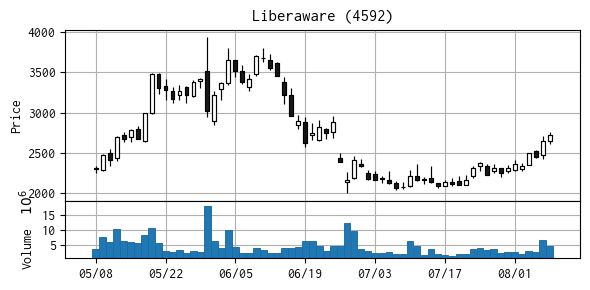

ranking/2025/0808_02_volatility.png


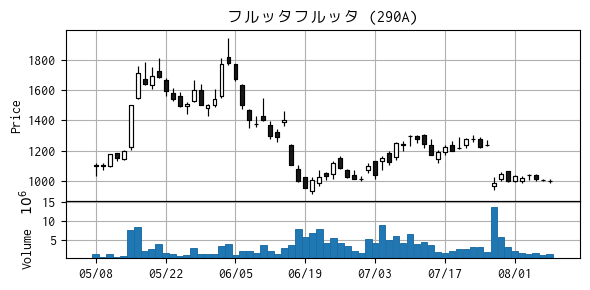

ranking/2025/0808_03_volatility.png


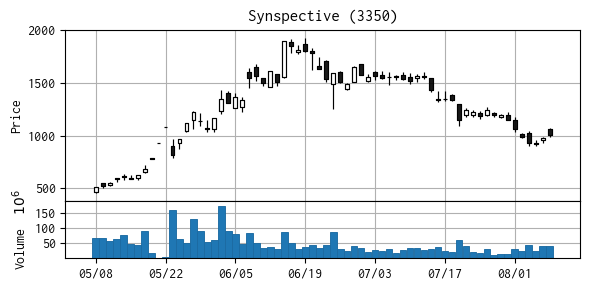

ranking/2025/0808_04_volatility.png


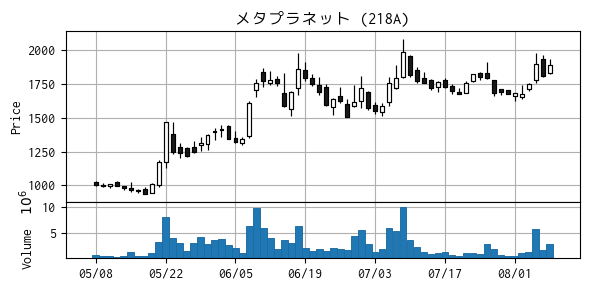

ranking/2025/0808_05_volatility.png


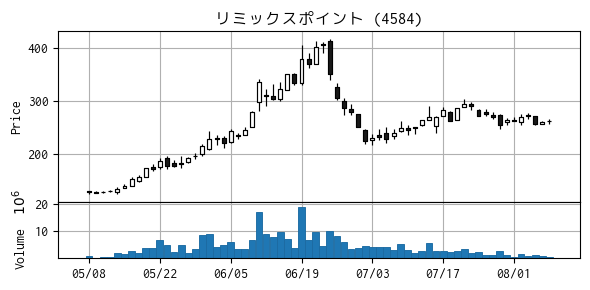

ranking/2025/0808_06_volatility.png


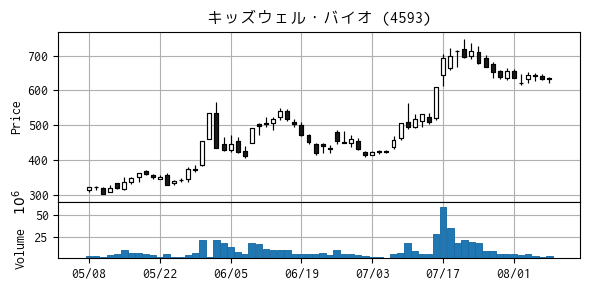

ranking/2025/0808_07_volatility.png


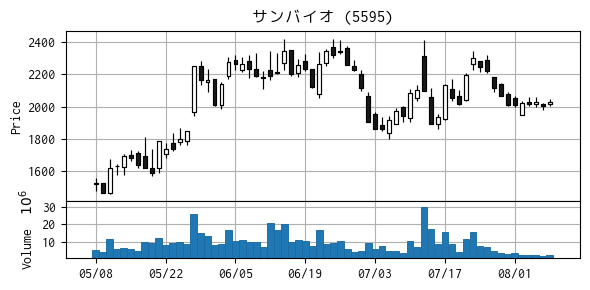

ranking/2025/0808_08_volatility.png


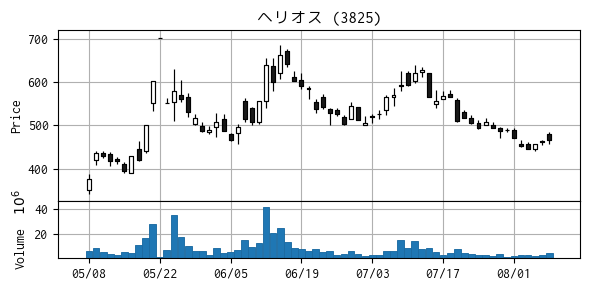

ranking/2025/0808_09_volatility.png


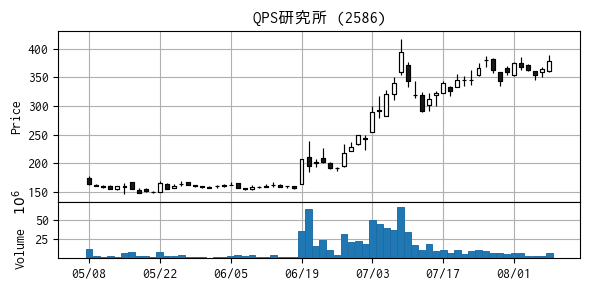

ranking/2025/0808_10_volatility.png


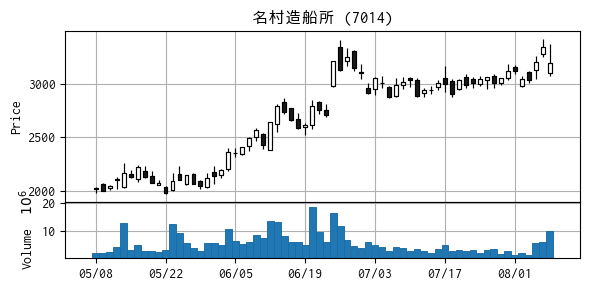

In [9]:
for ranking, code in enumerate(df_ranking["code"]):
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="3mo", interval="1d")
    
    FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
    fm.fontManager.addfont(FONT_PATH)
    
    # FontPropertiesオブジェクト生成（名前の取得のため）
    font_prop = fm.FontProperties(fname=FONT_PATH)
    font_prop.get_name()
    
    plt.rcParams["font.family"] = font_prop.get_name()
    plt.rcParams["font.size"] = 10
    fig = plt.figure(figsize=(6, 3))
    ax = dict()
    n = 2
    gs = fig.add_gridspec(
        n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
    )
    for i, axis in enumerate(gs.subplots(sharex="col")):
        ax[i] = axis
        ax[i].grid()
    
    mpf.plot(df, type="candle", style="default", volume=ax[1], datetime_format="%m/%d", xrotation=0, ax=ax[0])
    
    #dict_name = get_ticker_name_list([code])
    if code in dict_name.keys():
        name = unicodedata.normalize('NFKC', dict_name[code])
    elif "longName" in ticker.info.keys():
        name = ticker.info["longName"]
    elif "shortName" in ticker.info.keys():
        name = ticker.info["shortName"]
    else:
        name = ""
    
    ax[0].set_title(f"{name} ({code})")
    
    plt.tight_layout()
    dt = df.tail(1).index[0]
    name_chart = f"ranking/{dt.year:04d}/{dt.month:02d}{dt.day:02d}_{ranking + 1:02d}_volatility.png"
    print(name_chart)
    plt.savefig(name_chart)
    plt.show()
    plt.close()